<a href="https://colab.research.google.com/github/cce15/GoldVison/blob/main/robotArmFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
""" Kinematic chain of a robot arm (planar)
    Assignment
"""

' Kinematic chain of a robot arm (planar)\n    Assignment \n'


![](https://github.com/eraldoribeiro/assignment_robotarm2D/blob/main/robotArm01.png?raw=1)
*Figure 1*: A two-dimensional articulated arm. The articulated structure has 3 local coordinate frames each one centered at a joint. For each part, the local x-axis is aligned with the part.  

Consider the arm structure shown in Figure 1. Assume the following values for the arm configuration:
- The location of the first joint (i.e., the one that is attached to the ground support) is ${\bf p}_1 = \left(3,2\right)^\mathsf{T}$.
- The lengths of the parts are $L_1 = 5$ and  $L_2 = 8$.

In [6]:
import numpy as np
import math as mph
import matplotlib.pyplot as plt


### Question 1

Write the matrices that represent the local coordinate frames $\mathcal F\{1\}$, $\mathcal F\{2\}$, and $\mathcal F\{3\}$. These frames are indicated in green in Figure 1. The transformation matrices you need to write are $T_{0,1}$, $T_{1,2}$, and $T_{2,3}$.

In [11]:
# Answer goes here. Add more code/markdown cells as needed

# Given Values
phi_1= np.pi/8 # First angle
phi_2= np.pi/4 # Second angle
phi_3=0 # The angle of the last frame is zero because it is aligned with the previous frame
L1=5 # Length of the arm 1
L2=8 # Length of the arm 2
p0= np.array([3,2]) # Location of the first joint

# Frame {01}
T01= np.array([[np.cos(phi_1),-np.sin(phi_1),p0[0]]
               ,[np.sin(phi_1),np.cos(phi_1),p0[1]],
                [0            ,0            ,1]])

print(f"T01 {T01}")

# Frame {12}
T12= np.array([[np.cos(phi_2),-np.sin(phi_2),L1]
               ,[np.sin(phi_2),np.cos(phi_2),0],
                [0            ,0            ,1]])
print(f"T12 {T12}")

# Frame {23}
T23= np.array([[np.cos(phi_3),-np.sin(phi_3),L2]
               ,[np.sin(phi_3),np.cos(phi_3),0],
                [0            ,0            ,1]])
print(f"T23 {T23}")

T01 [[ 0.92387953 -0.38268343  3.        ]
 [ 0.38268343  0.92387953  2.        ]
 [ 0.          0.          1.        ]]
T12 [[ 0.70710678 -0.70710678  5.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
T23 [[ 1. -0.  8.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


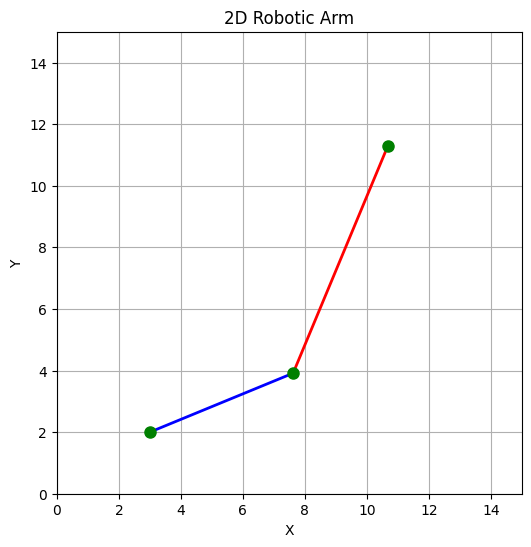

In [12]:
# Plot the robotic arm

# Calculate the positions of the joints
p1 = np.array([3, 2])
p2 = np.dot(T01[:2,:2], np.array([L1, 0])) + T01[:2,2]
p3 = np.dot(np.dot(T01[:2,:2],T12[:2,:2]),np.array([L2, 0])) + np.dot(T01[:2,:2],T12[:2,2])+ T01[:2,2]

# Plot the arm
plt.figure(figsize=(6, 6))
plt.plot([p1[0], p2[0]], [p1[1], p2[1]], 'b-', linewidth=2)
plt.plot([p2[0], p3[0]], [p2[1], p3[1]], 'r-', linewidth=2)

# Plot the joints
plt.plot(p1[0], p1[1], 'go', markersize=8)
plt.plot(p2[0], p2[1], 'go', markersize=8)
plt.plot(p3[0], p3[1], 'go', markersize=8)


# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Robotic Arm')
plt.grid(True)
plt.xlim([0, 15])
plt.ylim([0, 15])
plt.show()


[[ 0.38268343 -0.92387953 10.68086512]
 [ 0.92387953  0.38268343 11.30445342]
 [ 0.          0.          1.        ]]


In [ ]:
# point written w.r.t fram 0 (Global frame)
p_0= T03 @ e
print(p_0) # the arm end

[10.68086512 11.30445342  1.        ]


[[ 0.38268343 -0.92387953 10.68086512]
 [ 0.92387953  0.38268343 11.30445342]
 [ 0.          0.          1.        ]]


### Question 2

Write the matrices that represent each local frame w.r.t. the global frame $\mathcal F\{0\}$. The transformations you need to write are $T_{0,1}$, $T_{0,2}$, and $T_{0,3}$.

In [ ]:
# Answer goes here. Add more code/markdown cells as needed


T03= T01 @ T12 @ T23
print(T03)

T02= T01 @ T12
print(T02)

print(T01)

# point writen w.r.t Fram1
e= np.array([0,0,1])
T03= T01 @ T12 @ T23
print(T03)



### Question 3

Write the matrices that represent the local coordinate frames $\mathcal F\{1\}$, $\mathcal F\{2\}$, and $\mathcal F\{3\}$. These frames are indicated in green in Figure 1. The transformation matrices you need to write are $T_{0,1}$, $T_{1,2}$, and $T_{2,3}$.

In [ ]:
# Answer goes here. Add more code/markdown cells as needed




### Question 4

Using the transformations from the previous questions, calculate the global coordinates of the middle point of each part of the robot arm when $\phi_1 = \pi/8$ and $\phi_2 = \pi/4$. Hint: the location of the middle point of part 1 is $(\frac{L_1}{2},0)^\mathsf{T}$ (w.r.t. frame $\mathcal F\{1\}$).

In [ ]:
# Answer goes here. Add more code/markdown cells as needed






### Question 5

Using the transformations from the previous questions, calculate the global coordinates of all the joint points and the end-effector location when $\phi_1 = \pi/4$ and $\phi_2 = \pi/8$.

In [ ]:
# Answer goes here. Add more code/markdown cells as needed





### Question 6

Write the matrix that represents the coordinate frame of the end effector w.r.t. frame  $\mathcal F\{1\}$, i.e., $T_{1,3}$

In [ ]:
# Answer goes here. Add more code/markdown cells as needed




### Question 7

Write the matrix that represents the coordinate frame $\mathcal F\{1\}$ w.r.t. to the frame of the end effector

In [ ]:
# Answer goes here. Add more code/markdown cells as needed


